In [24]:
from helpers.util import load_audio
from IPython.display import Audio
import pandas as pd

df = pd.read_csv("data/bird_recordings.csv")

sample = df.sample(1)

print(sample.head())

id = sample['id'].values[0]

y, sr = load_audio(id)

print("Sample rate:", sr)

Audio(data=y, rate=sr)

         id        gen        ssp
323  405169  Cyanistes  caeruleus
Sample rate: 16000


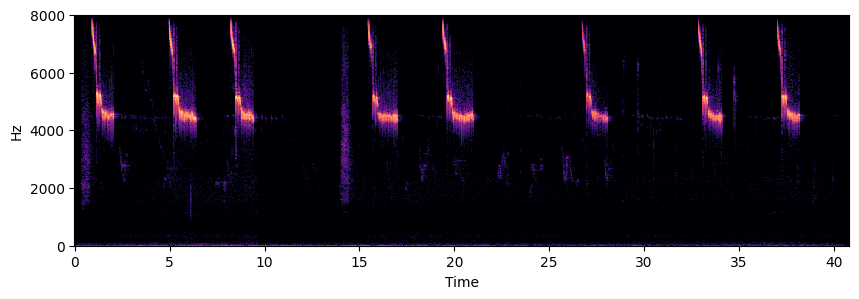

In [25]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from helpers.features import get_features

plt.figure(figsize=(10, 3))

# STFT
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr)

plt.show()

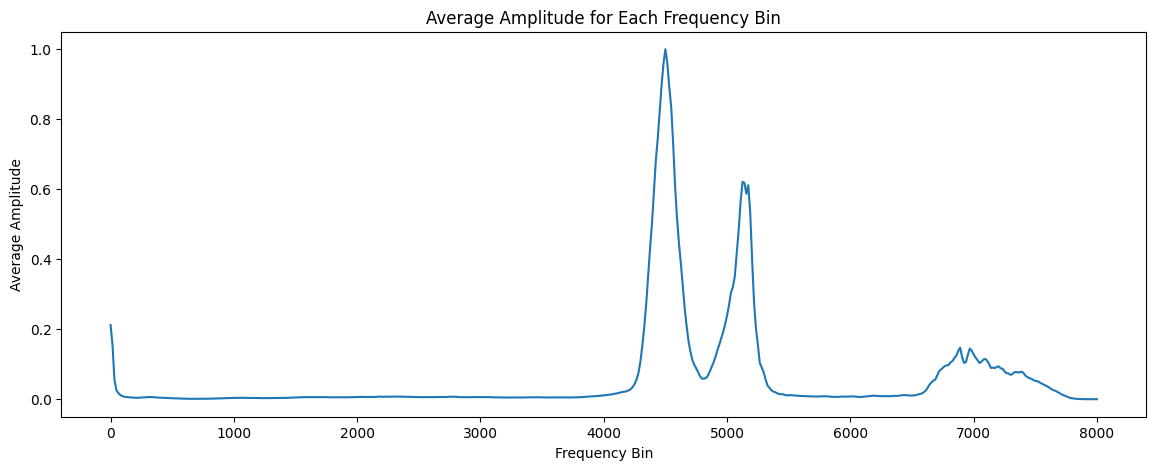

In [26]:
from helpers.features import get_frequency_content

fc = get_frequency_content(y)

# Plot the average amplitude per frequency bin
frequencies = librosa.fft_frequencies(sr=sr, n_fft=fc['stft'].shape[0]*2 - 2)
plt.figure(figsize=(14, 5))
plt.plot(frequencies, fc['average_amplitudes'])
plt.xlabel('Frequency Bin')
plt.ylabel('Average Amplitude')
plt.title('Average Amplitude for Each Frequency Bin')
plt.show()